In [1]:
import numpy as np
import skfda
from fpca import FPCABasis, FPCADiscretized
from skfda.representation.basis import FDataBasis
from skfda.datasets._real_datasets import fetch_growth, fetch_weather
from matplotlib import pyplot

We use the Berkeley Growth Study data for the purpose of illustrating how functional principal component analysis works

In [2]:
dataset = fetch_growth()
fd = dataset['data']
y = dataset['target']

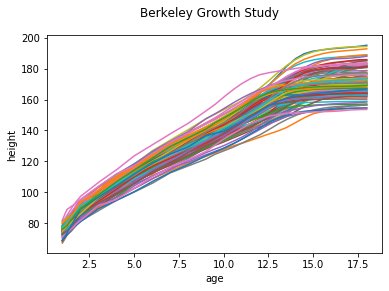

In [3]:
fd.plot()
pyplot.show()

In this case, we do not transform the data to a certain basis. We analyse the functional principal components using the discretized data. Observe that there are abrupt changes in the principal components

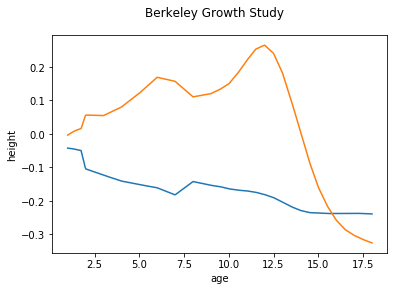

In [4]:
fpca_discretized = FPCADiscretized(2)
fpca_discretized.fit(fd)
fpca_discretized.components.plot()
pyplot.show()

we can choose to use eigenvalue and eigenvector analysis rather than using singular value decomposition, which is the default behaviour. Please note that it is more efficient to use svd

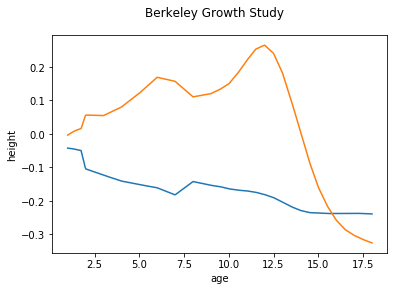

In [5]:
fpca_discretized = FPCADiscretized(2, svd=False)
fpca_discretized.fit(fd)
fpca_discretized.components.plot()
pyplot.show()

The scores (percentage) the first n components has over all the components

In [6]:
discretizedFPCA.transform(fd)

array([0.80414823, 0.13861057])

Now we study the dataset using its basis representation

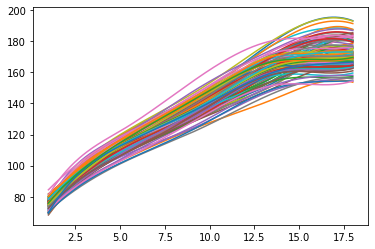

In [7]:
dataset = fetch_growth()
fd = dataset['data']
y = dataset['target']

basis = skfda.representation.basis.BSpline(n_basis=7)
basisfd = fd.to_basis(basis)

basisfd.plot()
pyplot.show()

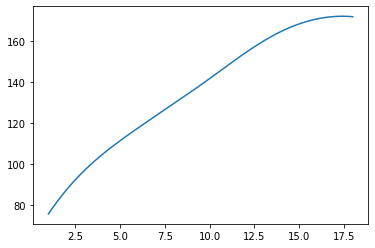

In [8]:
# obtain the mean function of the dataset for representation purposes
meanfd = basisfd.mean()

meanfd.plot()
pyplot.show()


Obtain first two principal components, observe that those two are very similar to the principal components obtained in the discretized analysis, only smoother due to the basis representation

[5.57673847e+02 9.20070385e+01 2.01867145e+01 7.12109835e+00
 3.00574871e+00 1.33090387e+00 4.02432202e-01]
FDataBasis(
    _basis=BSpline(domain_range=[[ 1. 18.]], n_basis=7, order=4, knots=[1.0, 5.25, 9.5, 13.75, 18.0]),
    coefficients=[[-0.08496812 -0.11289386 -0.16694664 -0.21276737 -0.31757592 -0.35642335
      -0.33056519]
     [ 0.00738993 -0.06897138 -0.10686955 -0.18635685 -0.47864279  0.78178633
       0.42255908]])


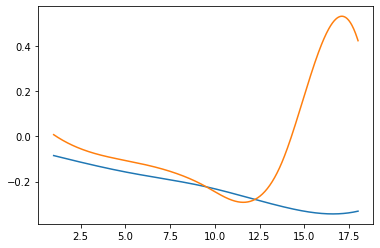

In [28]:
fpca = FPCABasis(2)
fpca.fit(basisfd)
print(fpca.component_values)
fpca.components.plot()
print(fpca.components)
pyplot.show()

FDataBasis(
    _basis=BSpline(domain_range=[[ 1. 18.]], n_basis=7, order=4, knots=[1.0, 5.25, 9.5, 13.75, 18.0]),
    coefficients=[[-0.08496812 -0.11289386 -0.16694664 -0.21276737 -0.31757592 -0.35642335
      -0.33056519]
     [-0.00738993  0.06897138  0.10686955  0.18635685  0.47864279 -0.78178633
      -0.42255908]])
[5.57673847e+02 9.20070385e+01 2.01867145e+01 7.12109835e+00
 3.00574871e+00 1.33090387e+00 4.02432202e-01]


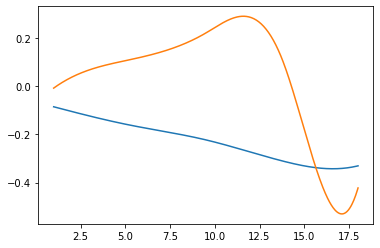

In [20]:
fpca = FPCABasis(2, svd=True)
fpca.fit(basisfd)
fpca.components.plot()
print(fpca.components)
print(fpca.component_values)
pyplot.show()

Fetch the dataset again as the module modified the original data and centers the original data.
The mean function is distorted after such transformation

In [29]:
dataset = fetch_growth()
fd = dataset['data']
basis = skfda.representation.basis.BSpline(n_basis=7)
basisfd = fd.to_basis(basis)

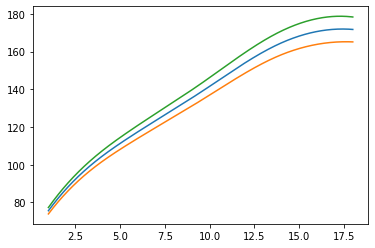

In [30]:
meanfd = basisfd.mean()
meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] + 20 * fpca.components.coefficients[0, :]])

meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] - 20 * fpca.components.coefficients[0, :]])

meanfd.plot()
pyplot.show()

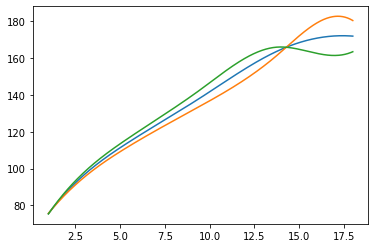

In [31]:
meanfd = basisfd.mean()
meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] + 20 * fpca.components.coefficients[1, :]])

meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] - 20 * fpca.components.coefficients[1, :]])

meanfd.plot()
pyplot.show()

## Canadian Weather Study 

In [24]:
def fetch_weather_temp_only():
    weather_dataset = fetch_weather()
    fd_data = weather_dataset['data']
    fd_data.data_matrix = fd_data.data_matrix[:, :, :1]
    fd_data.axes_labels = fd_data.axes_labels[:-1]
    return fd_data

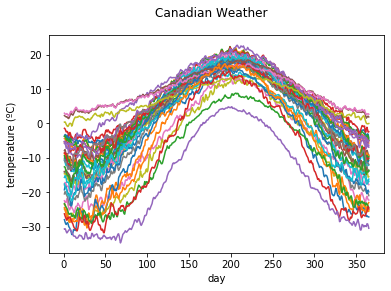

In [26]:
fd_data = fetch_weather_temp_only()
fd_data.plot()
pyplot.show()

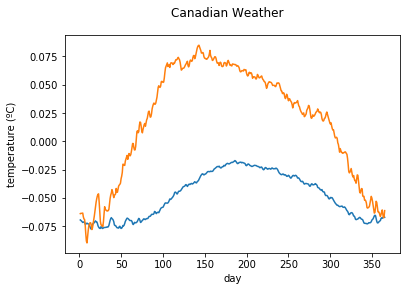

In [27]:
fpca_discretized = FPCADiscretized(2)
fpca_discretized.fit(fd_data)
fpca_discretized.components.plot()
pyplot.show()

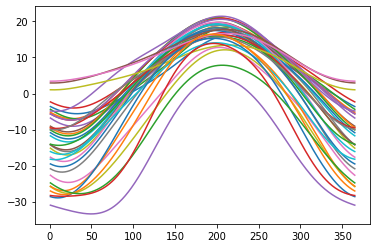

In [28]:
fd_data = fetch_weather_temp_only()

basis = skfda.representation.basis.Fourier(n_basis=7)
fd_basis = fd_data.to_basis(basis)

fd_basis.plot()
pyplot.show()

FDataBasis(
    _basis=Fourier(domain_range=[[  1 365]], n_basis=7, period=364),
    coefficients=[[-0.92331715 -0.14308529 -0.35425022 -0.0089843   0.02421851  0.0291243
       0.00182958]
     [ 0.33133158  0.03526095 -0.89315001 -0.17531623 -0.24006175 -0.03851005
      -0.03755887]])
[1.50817792e+04 1.43809210e+03 3.13967267e+02 8.07288671e+01
 1.43851817e+01 9.74183648e+00 3.80956311e+00]


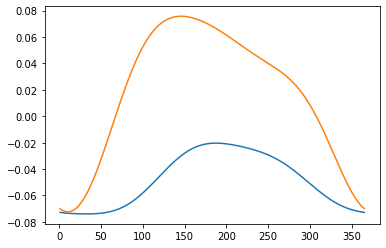

In [22]:
fpca = FPCABasis(2, svd=True)
fpca.fit(fd_basis)
fpca.components.plot()
print(fpca.components)
print(fpca.component_values)
pyplot.show()

Fetch the dataset again as the module modified the original data and centers the original data.
The mean function is distorted after such transformation

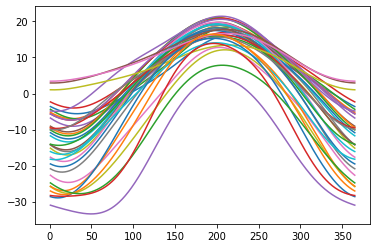

In [32]:
fd_data = fetch_weather_temp_only()

basis = skfda.representation.basis.Fourier(n_basis=7)
basisfd = fd_data.to_basis(basis)
basisfd.plot()
pyplot.show()

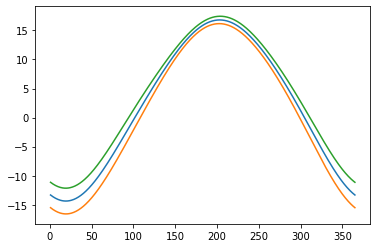

In [36]:
meanfd = basisfd.mean()
meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] + 30 * fpca.components.coefficients[0, :]])

meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] - 30 * fpca.components.coefficients[0, :]])

meanfd.plot()
pyplot.show()

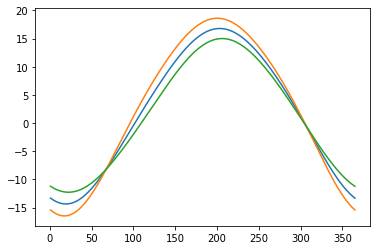

In [35]:
meanfd = basisfd.mean()
meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] + 30 * fpca.components.coefficients[1, :]])

meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] - 30 * fpca.components.coefficients[1, :]])

meanfd.plot()
pyplot.show()